# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

<img src="asset/vritual background algo.jpg">

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [181]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30',
    headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use `.content` to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [182]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [183]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

The information that we need are the `Date` and `Volume`, which contain in the table.
To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

<img src="asset/image1.jpg">

From inspect element we know that we will find the line table with class `table table-striped text-sm text-lg-normal`.
We can use the `find` method at our beautifulsoup object. So we can call our object to see what we get.

In [184]:
table = soup.find('table', attrs={'class': 'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:1000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-cente


In [185]:
tr.find_all('th')[0].text

'2021-05-02'

Finding row length.

In [186]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

60

The looping process to scrap the information: 

- Establish a placeholder to receive the information that we scrap. 
- Named the placeholder `temp` and it's a list. 
- Make a loop from one until the the length of the table row, 
- We will find all cell of the column one and two which contain `Date` and `Volume`. 
- Append it to the tuple that prepared before, 
- Every one iteration we will scrap one line of the table. 

In [187]:
temp = []

for tr in soup.find_all('tr')[1:]:
    x = tr.find_all('th')
    date = x[0].text
    y = tr.find_all('td')
    volume = y[1].text.strip()

    temp.append((date,volume))
    
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [188]:
temp = temp[::-1]
temp

[('2021-05-02', '$36,721,647,718'),
 ('2021-05-03', '$35,727,432,416'),
 ('2021-05-04', '$64,192,650,586'),
 ('2021-05-05', '$78,437,235,046'),
 ('2021-05-06', '$63,552,342,594'),
 ('2021-05-07', '$50,430,169,753'),
 ('2021-05-08', '$44,980,768,421'),
 ('2021-05-09', '$60,174,921,874'),
 ('2021-05-10', '$61,625,657,297'),
 ('2021-05-11', '$80,827,215,918'),
 ('2021-05-12', '$67,869,198,116'),
 ('2021-05-13', '$78,772,032,255'),
 ('2021-05-14', '$97,383,442,023'),
 ('2021-05-15', '$63,587,729,060'),
 ('2021-05-16', '$58,150,860,876'),
 ('2021-05-17', '$67,531,308,124'),
 ('2021-05-18', '$75,100,584,776'),
 ('2021-05-19', '$59,160,464,538'),
 ('2021-05-20', '$117,905,041,184'),
 ('2021-05-21', '$92,538,167,828'),
 ('2021-05-22', '$115,000,901,892'),
 ('2021-05-23', '$102,524,751,568'),
 ('2021-05-24', '$77,839,858,614'),
 ('2021-05-25', '$73,496,058,831'),
 ('2021-05-26', '$92,468,701,274'),
 ('2021-05-27', '$53,115,222,705'),
 ('2021-05-28', '$44,070,236,220'),
 ('2021-05-29', '$49,493,

## Creating data frame & Data wrangling

Put the array into dataframe

In [198]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','volume'))
df.head()

,date,volume
0,2021-05-02,"$36,721,647,718"
1,2021-05-03,"$35,727,432,416"
2,2021-05-04,"$64,192,650,586"
3,2021-05-05,"$78,437,235,046"
4,2021-05-06,"$63,552,342,594"


check the dataframe data types to see if the data is useable

In [199]:
df.dtypes

date      object
volume    object
dtype: object

Change the `Date` to `datetime` datatype and `Volume` to `Float` data type.

In [200]:
df['date'] = df['date'].astype('datetime64')
df['volume'] = df['volume'].str.replace('$', '')
df['volume'] = df['volume'].str.replace(',', '')
df['volume'] = df['volume'].astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_7928\2006813622.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace('$', '')


In [201]:
df.dtypes

date      datetime64[ns]
volume             int64
dtype: object

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` 

In [202]:
df = df.set_index('date')

And done, We can do our simple visualisation.

<AxesSubplot:xlabel='date'>

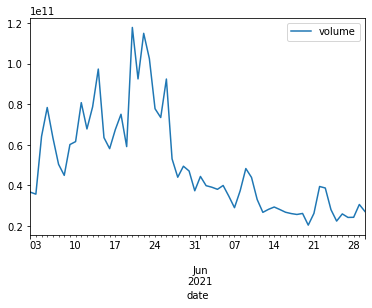

In [203]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

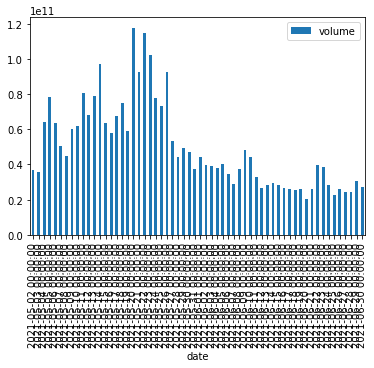

In [209]:
df.plot(kind='bar')

Volume penjualan Etherium pada periode 1 Januari 2020 s.d. 30 Juni 2021 mengalami penurunan terus walaupun sempat mengalami peningkatan yg signifikan pada pertengahan awal periode.


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` and `index.html`.